In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv"

datav_df = pd.read_csv(url, sep= ";")

#Modificación de valores numéricos para que se puedan tratar como tales.

datav_df["Inversion"].replace(",",".", inplace=True, regex=True)
datav_df["Inversion"] = datav_df["Inversion"].astype(np.float64)
datav_df["Ventas"].replace(",",".", inplace=True, regex=True)
datav_df["Ventas"] = datav_df["Ventas"].astype(np.float64)

datav_df.head(5)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62


In [ ]:
#Revisión de datos nulos del data set.

print("Datos nulos: \n{}".format(datav_df.isnull().any()))

print("\nForma: \n{}\n".format(datav_df.shape))

print(datav_df.info())

Datos nulos: 
Fecha_anual    False
Inversion      False
Ventas         False
dtype: bool

Forma: 
(38, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
None


El dataset está compuesto por tres variables con 38 observaciones. De las mismas, no se encontraron valores nulos al ser explorado. Se puede decir entonces que hay calidad suficiente para continuar con el estudio del mismo.

Con respecto al análisis de las variables, si bien el año refiere al tiempo (el cual es una variable cuantitativa continua que puede tomar infinitos valores), lo tomaremos como una variable categórica ordinal a efectos del análisis. Esto se debe a que no se van a realizar operaciones con la variable, sino que permite principalmente categorizar y ordenar la información en función del tiempo.
Para el caso de las dos restantes variables (ventas e inversión), ambas son variables cuantitativas continuas que pueden tomar infinitos valores y se comportan de manera similar a variables analizadas en prácticas anteriores (ej.: Precio).

Para la recta de regresión, voy a tomar a "X" como el valor de la inversión y a "Y" como el valor de las ventas. El motivo principal por el cual tomo este criterio es que la inversión es un valor que deberíamos poder controlar dentro de una compañía, mientras que las ventas es una variable que responde a la misma. Si tomamos la inversión como aquella destinada a potenciar las ventas (ej.: inversión en mercadeo, logística, producción, etc.) podemos decir que la inversión será una variable explicativa de las ventas.

In [ ]:
#Regla Sturges para intervalos
print(1+3.22*np.log10(len(datav_df)))

6.086903181106129


In [ ]:
#Tomando 6 intervalos, genero un tabla de doble entrada para tener una primera exploración de la relación de ambas variables

inversion = pd.qcut(datav_df["Inversion"], 6)
ventas = pd.qcut(datav_df["Ventas"], 6)
pd.crosstab(ventas, inversion)


Inversion,"(0.999, 4.083]","(4.083, 7.167]","(7.167, 10.25]","(10.25, 13.333]","(13.333, 16.417]","(16.417, 19.5]"
Ventas,,,,,,
"(0.619, 6.498]",7,0,0,0,0,0
"(6.498, 8.433]",0,6,0,0,0,0
"(8.433, 11.08]",0,0,5,1,0,0
"(11.08, 12.55]",0,0,1,4,1,0
"(12.55, 15.025]",0,0,0,1,4,1
"(15.025, 17.45]",0,0,0,0,1,6


In [ ]:
#Cálculo de la covarianza

covarianza_ventas_inversion = datav_df["Inversion"].cov(datav_df["Ventas"])

print("Covarianza: {}".format(covarianza_ventas_inversion))

Covarianza: 22.92993243243243


A partir de la tabla de doble entrada anterior, se puede ver que existe relación entre ambas variables. De todas maneras, por la forma en que se segmentaron las variables, no se ve una relación de dependencia funcional recíproca a simple vista. Para analizar la relación de ambas variables debo seguir adelante con el análisis.

Adicionalmente, al calcular la covarianza (2,93), podemos notar que ambas variables varían en el mismo sentido y es por tanto una nube de puntos creciente. 

Lo expuesto anteriormente se puede visualizar gráficamente en la nube de puntos generada debajo.

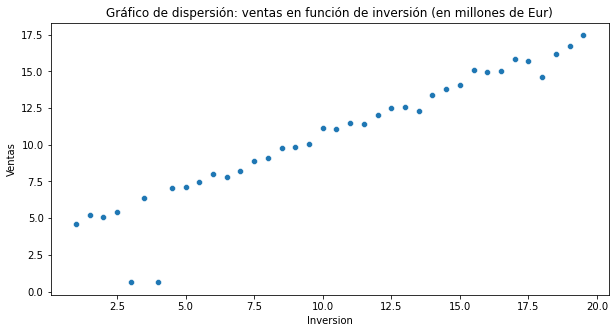

In [ ]:
plt.figure(figsize= (10,5))
sns.scatterplot(y= datav_df["Ventas"],x =datav_df["Inversion"]).set_title("Gráfico de dispersión: ventas en función de inversión (en millones de Eur)")
plt.show()

A simple vista se puede percibir cierta "linealidad"; si se dibujara una línea imaginaria, la misma podría pasar por la mayoría de los puntos graficados.

Con lo anterior como premisa, voy a generar un modelo de regresión lineal que intente predecir el nivel de ventas en función de la inversión realizada. Posteriormente voy a analizar valores como su coeficiente de determinación para entender la bondad de ajuste y eficacia del modelo.

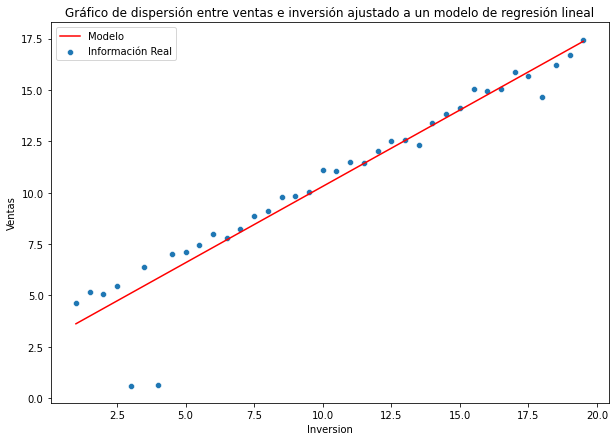

In [ ]:
#Modelo de regresión lineal sin ajustar valores distorsionantes

#La función va a ser del estilo Ventas = Ordenada en el origen + Inversión * pendiente + error aleatorio

#Pendiente 

pendiente = covarianza_ventas_inversion/ datav_df["Inversion"].var()

#Ordenada en el origen

ordenada = datav_df["Ventas"].mean() - pendiente*datav_df["Inversion"].mean()

def modelo_regresion (x, pend, ord):
  yestimado= []
  for i in x:
    y = ord + pend*i
    yestimado.append(y)
  yestimado_serie = pd.Series(yestimado)
  return(yestimado_serie)

plt.figure(figsize=(10,7))
sns.scatterplot(y= datav_df["Ventas"],x =datav_df["Inversion"])
plt.plot(datav_df["Inversion"], modelo_regresion(datav_df["Inversion"],pendiente,ordenada), color="Red")
plt.title("Gráfico de dispersión entre ventas e inversión ajustado a un modelo de regresión lineal")
plt.legend(labels = ["Modelo","Información Real"])
plt.show()


En el gráfico superior se puede notar el mismo gráfico de dispersión generado anteriormente pero con la adición de una recta que denota el modelo de regresión lineal y su comportamiento en comparación a la información real.

El modelo generado fue:

y= 2.8805 + 0.7427 * x + ε

El primer valor (2.8805) representa la ordenada en el origen. Es el punto en el cual, siendo inversión = 0 las ventas se encontrarían. Por otro lado, el valor 0.7427 representa la pendiente de la recta y su significado matemático refiere a la sensibilidad que tienen las ventas sobre la inversión realizada. Una pendiente mayor significaría que cualquier cambio marginal en X genera una respuesta mucho mayor en Y. Por último, epsilon representa el error aleatorio. Este error representa el ajuste que hace el modelo y es la diferencia entre el resultado real y el resultado teórico que surge a partir del modelo.

Por otro lado, se puede ver que dos valores de inversión no generaron el retorno esperado en las ventas en los años 1.984 y 1.986. Al analizar la situación macroeconómica de España por medio del indicador del crecimiento del PBI, no se notan caídas significativas durante ese período (Fuente: https://ourworldindata.org/grapher/national-gdp?time=1980..latest&country=~ESP).
 Dicho lo anterior, no se encuentra un motivo macroeconómico que permita explicar esta caída, y por lo tanto, conviene mantener estos valores dentro del dataset.

A pesar de lo anterior, se muestra graficamente la diferencia entre los dos modelos: uno con todos los valores y otro sin los referentes a 1.984 y 1.986 con el fin de demostrar el peso relativo que tienen los mismos en el modelo. Cabe repetir que el modelo de referencia a utilizar es aquel que incluye todos los valores del dataset.

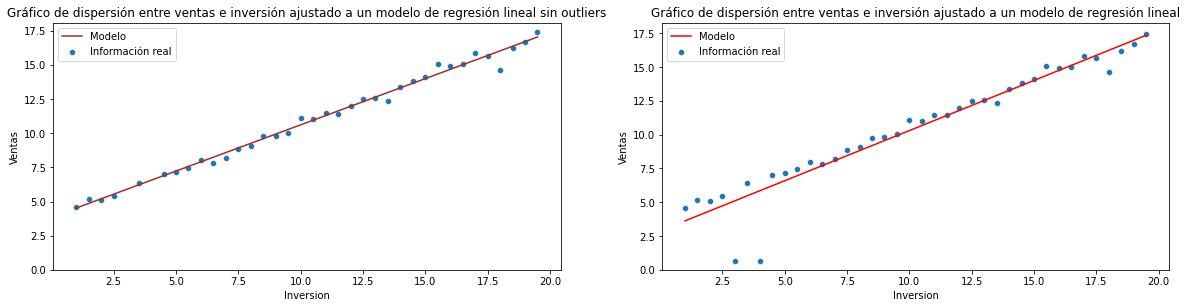

In [ ]:
#Modelo ajustado sin valores "distorsionantes" (años 1984 & 1986)

inversion_sub1 = pd.DataFrame(datav_df.copy())
inversion_sub1.drop(datav_df[(datav_df["Fecha_anual"]== 1984)].index,inplace = True)
inversion_sub1.drop(datav_df[(datav_df["Fecha_anual"]== 1986)].index,inplace = True)
pendiente_sub1= inversion_sub1["Inversion"].cov(inversion_sub1["Ventas"]) / inversion_sub1["Inversion"].var()
ordenada_sub1= inversion_sub1["Ventas"].mean() - pendiente_sub1*inversion_sub1["Inversion"].mean()

plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
sns.scatterplot(x=inversion_sub1["Inversion"], y=inversion_sub1["Ventas"])
plt.plot(inversion_sub1["Inversion"], modelo_regresion(inversion_sub1["Inversion"], pendiente_sub1, ordenada_sub1), color="brown")
plt.legend(labels=["Modelo","Información real"])
ax = plt.gca()
ax.set_ylim(bottom= 0)
plt.title("Gráfico de dispersión entre ventas e inversión ajustado a un modelo de regresión lineal sin outliers")

plt.subplot(2,2,2)
sns.scatterplot(y= datav_df["Ventas"],x =datav_df["Inversion"])
plt.plot(datav_df["Inversion"], modelo_regresion(datav_df["Inversion"],pendiente,ordenada), color="Red")
ax = plt.gca()
ax.set_ylim(bottom= 0)
plt.legend(labels=["Modelo","Información real"])
plt.title("Gráfico de dispersión entre ventas e inversión ajustado a un modelo de regresión lineal")

plt.show()

A nivel gráfico se explicita que la recta de regresión cubre mas puntos de lo que originalmente lo hacía, principalmente debido a que los valores de 1984 y 1986 fueron eliminados y su importancia relativa desestimada. El modelo tendría un mejor ajuste (ej.: mejor correlación de Pearson) pero no representaría fielmente la realidad. Es por esto que se decide continuar incluyendo en el modelo dichos valores.

In [ ]:
#Calculo de ventas con una inversión = 7

print("Si se invirtieran 7 Millones Eur, se obtendrían {} Millones Eur de ventas según el modelo generado, con un error aleatorio del mismo".\
      format(modelo_regresion([7], pendiente, ordenada)[0]))

print("\nCuando se invirtieron 7 Millones Eur en el pasado, se obtuvieron {} Millones Eur de ventas".format(datav_df.loc\
                                                                                              [(datav_df['Inversion']== 7)]["Ventas"].values[0]))

Si se invirtieran 7 Millones Eur, se obtendrían 8.079217638691322 Millones Eur de ventas según el modelo generado, con un error aleatorio del mismo

Cuando se invirtieron 7 Millones Eur en el pasado, se obtuvieron 8.22 Millones Eur de ventas


Al comparar el valor real contra el devuelto por el modelo al invertir 7 millones de euros, se puede notar de forma mas explícita a lo que se refiere el error (ε) del modelo. 

Mientras que en el dato real muestra que se obtuvieron 8.22 millones de euros en ventas, el modelo devuelve un valor menor (8.08 millones Eur) y, por lo tanto, en este caso el error del modelo es de 0.14 millones de euros. 

Esta diferencia se nota a nivel gráfico debajo, donde la línea roja representa el modelo y el punto azul el valor real. Este gráfico es una ampliación del modelo que se viene analizando. El eje de las ordenadas ha cambiado solamente para mostrar un intervalo menor y poder detallar de forma mas fiel la diferencia entre ambos valores. Como se puede observar, el valor del modelo se encuentra levemente por debajo del real, como se mostró anteriormente.

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


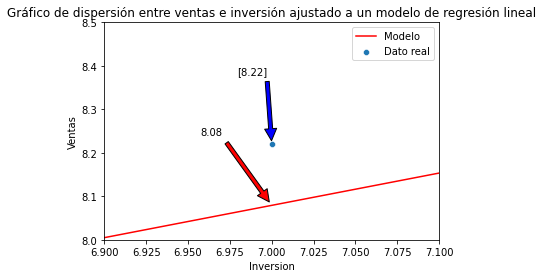

In [ ]:
fig, ax= plt.subplots()
sns.scatterplot(y= datav_df["Ventas"],x =datav_df["Inversion"])
ax = plt.gca()
ax.set_ylim(bottom= 8, top= 8.5)
ax.annotate(datav_df.loc[(datav_df["Inversion"]== 7),["Ventas"]].values[0],\
            (datav_df.loc[(datav_df["Inversion"]== 7),["Inversion"]].values[0]\
             , datav_df.loc[(datav_df["Inversion"]== 7),["Ventas"]].values[0])\
            , arrowprops=dict(facecolor='Blue', shrink=0.05)
            , textcoords="offset points"
            , xytext=(-20,70)
            , ha='center')


plt.plot(datav_df["Inversion"], modelo_regresion(datav_df["Inversion"],pendiente,ordenada), color="Red")
plt.title("Gráfico de dispersión entre ventas e inversión ajustado a un modelo de regresión lineal")
plt.legend(labels=["Modelo","Dato real"])
ax.set_xlim(left = 6.9, right= 7.1)

ax.annotate(round(modelo_regresion([7],pendiente,ordenada)[0],2), (7, (modelo_regresion([7],pendiente,ordenada)))\
            , arrowprops=dict(facecolor='Red', shrink=0.05)
            , textcoords="offset points"
            , xytext=(-60,70)
            , ha='center')
plt.show()

In [ ]:
# Coeficiente de correlación de Pearson
print("Coeficiente de correlación de Pearson: {}\n".format(covarianza_ventas_inversion/(datav_df["Inversion"].std()*datav_df["Ventas"].std())))

# Coeficiente de determinación

numerador = ((modelo_regresion(datav_df["Inversion"],pendiente, ordenada)-datav_df["Ventas"].mean())**2).sum()
denominador = ((datav_df["Ventas"]-datav_df["Ventas"].mean())**2).sum()

print("Coeficiente de determinación: {}\n".format(numerador/denominador))

# SCE
#Aclarar que nos va a servir para comparar modelos; no nos va a servir mucho ahora

print("SCE: {}".format(((modelo_regresion(datav_df["Inversion"],pendiente, ordenada) - datav_df["Ventas"])**2).sum()))

Coeficiente de correlación de Pearson: 0.9562823420491506

Coeficiente de determinación: 0.9144759177150084

SCE: 58.92728845606739


Analizando estos valores, lo que hago es verificar la eficacia del modelo en representar los datos que utilizamos para su confección.

Mediante el coeficiente de correlación de Pearson, mido el ajuste o relación mútua que tienen las variables. Su fórmula matemática se expresa como la división de la covarianza de ambas entre la desviación típica de ventas multiplicada por la desviación típica de inversión. El coeficiente toma valores entre -1 y 1; cuanto mas cerca de +1 se encuentre se tiene una mayor relación directa entre ambas, lo cual sucede en este caso (0.96). Esto quiere decir que cuando la inversión varía, las ventas varían a su vez en la misma dirección.

Por otro lado, el coeficiente de determinación es una forma de calcular la bondad de ajuste. La misma, mide la similitud que existe entre los valores reales y los valores calculados a partir del modelo generado. En el caso de la regresión lineal, se puede definir como el cuadrado del coeficiente de correlación de Pearson, aunque en este caso decidí hacer la fórmula matemática propia del coeficiente. Toma valores entre 0 y 1; cuanto mas cerca de 1, mejor es el ajuste que hace el modelo a los datos reales que tenemos. En este caso, se tiene un número alto de coeficiente de determinación (0.91), lo cual quiere decir que el modelo ajusta correctamente. El coeficiente de determinación recibe críticas al decir que no penaliza la inclusión de variables extra; en este caso se utiliza este coeficiente porque solamente se están analizando dos variables (ventas e inversión).

Por último punto, el SCE mide la suma al cuadrado de los errores del modelo. Los errores son la diferencia entre el valor real de las ventas y el valor predicho a partir del modelo. Lo que se busca al modelizar es minimizar este valor. Este valor por si mismo es poco explicativo en este contexto pero puede ser de gran utilidad si quisieramos comparar distintos modelos para entender cual genera menor error.


Como conclusión, se puede decir que el modelo generado (tomando en cuenta los valores de 1984 y 1985) es eficaz al predecir el valor de ventas en función de las ventas para las condiciones y dataset analizado. Ambas variables se encuentran fuertemente correladas y mantienen una relación lineal, por lo cual, a mayor inversión realizada, mayor será el nivel de ventas.